**IMPORTS**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk.stem import WordNetLemmatizer
import spacy


# NLTK Stop words

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['background', 'methods', 'introduction', 'conclusions', 'results', 
                   'purpose', 'materials', 'discussions','methodology','result analysis'])

**reading the dataset**

In [10]:
biorxiv_clean = pd.read_csv('/kaggle/input/biorxiv-cleancsv/biorxiv_clean.csv')

In [11]:
biorxiv_clean.head(2)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,5daceb492bad28a61fc43c4be83a164042d8c430,Recombinant rotaviruses rescued by reverse gen...,"Guido Papa, Luca Venditti, Francesca Arnoldi, ...","Guido Papa (ICGEB, Padriciano 99, 34149 9, Tri...",Abstract\n\nRotavirus (RV) replicates in round...,Rescue of recombinant RVs (rRVs) from cloned c...,"∆3 cells, as indicated. The experiment was 836...","[{'first': 'Guido', 'middle': [], 'last': 'Pap...","{'BIBREF0': {'ref_id': 'b0', 'title': '∆3 cell..."
1,4bc43084ccdb8d3bb704ca577473169cd1a64f9c,Risk estimation and prediction by modeling the...,"Hui Wan, † , Jing-An Cui, Guo-Jing Yang",Hui Wan (Swiss Tropical and Public Health Inst...,"Abstract\n\nBackground: In December 2019, an o...","\n\nbelong to the order of Nidovirales, family...","Novel Wuhan (2019-nCoV) Coronavirus, W G Carlo...","[{'first': 'Hui', 'middle': [], 'last': 'Wan',...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Novel W..."


first text of biorxiv_clean dataset

In [12]:
biorxiv_clean.text[0]

"Rescue of recombinant RVs (rRVs) from cloned cDNAs. 272\n\nTo rescue recombinant RV strain SA11 (rRV-WT), monolayers of BHK-T7 cells 273 (4 × 10 5 ) cultured in 12-well plates were co-transfected using 2.5 μL of TransIT-274 LT1 transfection reagent (Mirus) per microgram of DNA plasmid. Each mixture 275 comprised 0.8 μg of SA11 rescue plasmids: pT7-VP1, pT7-VP2, pT7-VP3, pT7-276 VP4, pT7-VP6, pT7-VP7, pT7-NSP1, pT7-NSP3, pT7-NSP4, and 2.4 μg of pT7-277 NSP2 and pT7-NSP5 (29). Furthermore 0.8 μg of pcDNA3-NSP2 and 0.8 μg of 278 . CC-BY-ND 4.0 International license is made available under a The copyright holder for this preprint (which was not peer-reviewed) is the author/funder. It . https://doi.org/10.1101/660217 doi: bioRxiv preprint pcDNA3-NSP5, encoding NSP2 and NSP5 proteins, were also co-transfected to 279 increase rescue efficiency. 280To rescue recombinant rRVs encoding NSP5 mutants, pT7 plasmids encoding 281 \n\nImmunofluorescence microscopy 293\n\nImmunofluorescence experiment

# Part 1 :  Working with biorxiv

# biorxiv_clean papers Abstract - frequent words 

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

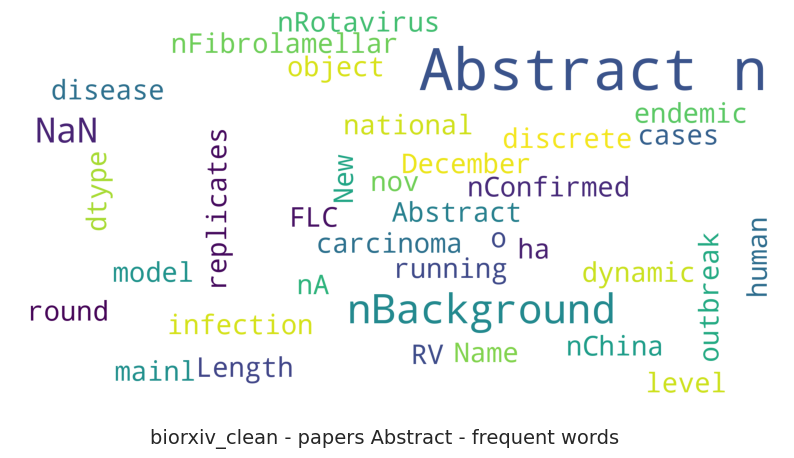

In [15]:
show_wordcloud(biorxiv_clean['abstract'], title = 'biorxiv_clean - papers Abstract - frequent words')

# Convert abstract to list

In [16]:
df = biorxiv_clean
df = df.abstract.dropna() 
data = df.values.tolist()

dropna() will delete rows that have missing value in the abstract column, tolist() converts the dataframe into a list.

* all the sentences and corresponding similar sentences have been stored in a pandas dataframe called simsentence**

### use the new dataframe as csv file for possible further research

**The function below converts sentences to words using gensim**

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(data))

print(data_words[:1])

[['abstract', 'rotavirus', 'rv', 'replicates', 'in', 'round', 'shaped', 'cytoplasmic', 'viral', 'factories', 'although', 'how', 'they', 'assemble', 'remains', 'unknown', 'during', 'rv', 'infection', 'nsp', 'undergoes', 'which', 'is', 'primed', 'by', 'the', 'phosphorylation', 'of', 'single', 'serine', 'residue', 'the', 'role', 'of', 'this', 'post', 'translational', 'modification', 'in', 'the', 'formation', 'of', 'viroplasms', 'and', 'its', 'impact', 'on', 'the', 'virus', 'replication', 'remains', 'obscure', 'here', 'we', 'investigated', 'the', 'role', 'of', 'nsp', 'during', 'rv', 'infection', 'by', 'taking', 'advantage', 'of', 'modified', 'fully', 'tractable', 'reverse', 'genetics', 'system', 'an', 'nsp', 'trans', 'complementing', 'cell', 'line', 'was', 'used', 'to', 'generate', 'and', 'characterise', 'several', 'recombinant', 'rotaviruses', 'rrvs', 'with', 'mutations', 'in', 'nsp', 'we', 'demonstrate', 'that', 'rrv', 'lacking', 'nsp', 'was', 'completely', 'unable', 'to', 'assemble', 'v

yield will return a generator, that used gensim.utils.simple_preprocess() function and for each sentence, will convert it into list of preprocessed words

# Build the bigram and trigram models using gensim

In [18]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['abstract_background', 'in', 'december', 'an', 'outbreak', 'of', 'novel_coronavirus', 'disease', 'emerged', 'in', 'wuhan_china', 'and', 'has', 'swiftly', 'spread', 'to', 'other', 'parts', 'of', 'china', 'and', 'number', 'of', 'oversea', 'countries', 'our', 'aim', 'is', 'to', 'evaluate', 'the', 'effectiveness', 'of', 'the', 'evolution', 'of', 'interventions', 'and', 'self', 'protection', 'measures', 'estimate', 'the', 'risk', 'of', 'partial', 'lifting', 'control_measures', 'and', 'predict', 'the', 'epidemic', 'trend', 'of', 'the', 'virus', 'in', 'mainland_china', 'excluding_hubei', 'province', 'based_on', 'the', 'published', 'data', 'and', 'novel', 'mathematical_model', 'novel', 'covid', 'transmission', 'dynamic', 'model', 'incorporating', 'the', 'intervention', 'measures', 'implemented', 'in', 'china', 'is', 'proposed', 'we', 'parameterize', 'the', 'model', 'by', 'using', 'the', 'markov', 'chain', 'monte_carlo', 'mcmc', 'method', 'and', 'estimate', 'the', 'control', 'reproduction_numb

creating a bigram model using the Phrases class from Gensim, using data_words which contains preprocessed word lists. The min_count parameter specifies the minimum frequency a phrase needs to appear in the corpus to be considered as a bigram, and the threshold parameter controls the threshold for forming the bigrams.

The Phraser class is a faster way to apply a trained phrase model to a sequence.


# Define functions for stopwords, bigrams, trigrams and lemmatization

In [19]:
#https://github.com/cjriggio/classifying_medical_innovation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


text processing and lemmatization.

remove_stopwords(texts), make_bigrams(texts), make_trigrams(texts) all are use a list comprehension to iterate over each word in texts lists. 

then, performs lemmatization on a list of texts using SpaCy. It takes the texts list as input and Within the loop, it joins the words in each sentence with a space and processes them using SpaCy's nlp pipeline.

It then retrieves the lemma of each token in the sentence token.lemma_ 
if its part-of-speech token.pos_ 


In [24]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1])

['abstract', 'outbreak', 'novel_coronavirus', 'disease', 'emerge', 'swiftly', 'spread', 'part', 'number', 'country', 'aim', 'evaluate', 'effectiveness', 'evolution', 'intervention', 'self', 'protection', 'measure', 'estimate', 'risk', 'partial', 'lifting', 'control_measure', 'predict', 'epidemic', 'trend', 'virus', 'base', 'publish', 'data', 'novel', 'novel', 'covid', 'transmission', 'dynamic', 'model', 'incorporate', 'intervention', 'measure', 'implement', 'propose', 'parameterize', 'model', 'use', 'markov', 'chain', 'mcmc', 'method', 'estimate', 'control', 'reproduction_number', 'well', 'effective', 'daily', 'reproduction', 'ratio', 'disease', 'transmission', 'excluding_hubei', 'outcome', 'indicate', 'control', 'drop', 'imply', 'implement', 'chinese', 'government', 'province', 'indeed', 'effective', 'magnificently', 'suppress', 'covid', 'transmission', 'moreover', 'show', 'relieve', 'personal', 'protection', 'early', 'lead', 'spread', 'disease', 'long', 'time', 'people', 'infected', 




nlp = spacy.load('en', disable=['parser', 'ner']):  By default, when loading the English model in SpaCy, both the tagger and the named entity recognizer components are enabled.but here we load the SpaCy English model with only the tagger component enabled. 

The allowed_postags argument allows to specify the part-of-speech tags for which lemmatization should be applied. In this case, the allowed tags are 'NOUN', 'ADJ', 'VERB', and 'ADV', which correspond to nouns, adjectives, verbs, and adverbs, respectively.

When the lemmatization() function is called, it will iterate over the tokens in each sentence and check their part-of-speech tags. Only the tokens with allowed tags will be lemmatized, and the rest will be excluded.


In [25]:
print(data_lemmatized[:1])

[['abstract', 'rotavirus', 'rv', 'replicate', 'round', 'shape', 'cytoplasmic', 'viral', 'factory', 'assemble', 'remain', 'unknown', 'rv', 'infection', 'prime', 'phosphorylation', 'single', 'serine', 'residue', 'role', 'post_translational', 'modification', 'formation', 'viroplasm', 'impact', 'virus', 'replication', 'remain', 'obscure', 'investigate', 'role', 'nsp', 'rv', 'infection', 'take', 'advantage', 'modify', 'fully', 'tractable', 'reverse_genetic', 'system', 'nsp', 'complement', 'cell_line', 'use', 'generate', 'characterise', 'several', 'recombinant', 'rotavirus', 'rrvs', 'mutation', 'nsp', 'demonstrate', 'lacking', 'nsp', 'completely', 'unable', 'assemble', 'viroplasm', 'replicate', 'confirm', 'pivotal', 'role', 'rotavirus', 'replication', 'number', 'mutant', 'impaired', 'nsp', 'phosphorylation', 'generate', 'interrogate', 'function', 'post_translational', 'modification', 'assembly', 'replication', 'competent', 'viroplasm', 'show', 'rrv', 'mutant', 'strain', 'exhibit', 'impair', 


# Create Dictionary,Corpus and Document Frequency

In [26]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 3), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 4), (37, 2), (38, 1), (39, 1), (40, 2), (41, 2), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 5), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 2), (63, 1), (64, 1), (65, 4), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 14), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 6), (79, 2), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 2), (90, 2), (91, 3), (92, 7), (93, 2), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 5), (100, 6), (101, 3), (102, 2), (103, 1), (104, 9), (105, 1), (106, 1), (107, 1), (108, 3), (109, 1), (110, 2

id2word is a Dictionary object that maps words to unique IDs created using the corpora.Dictionary class from Gensim.

The doc2bow() method performs the following steps:

Tokenization: It tokenizes the input text, splitting it into individual words or tokens.

Word ID mapping: For each token in the text, it checks if the token exists in the dictionary (id2word). If the token is present, it retrieves the corresponding unique ID assigned to that word. If the token is not present, it assigns a new unique ID to the token and adds it to the dictionary.

Counting word occurrences: It counts the frequency of each word in the document.

Output: The method returns a list of (word_id, word_frequency) tuples, where word_id is the unique ID of the word in the dictionary, and word_frequency is the count of occurrences of that word in the document.

The resulting list of tuples represents the bag-of-words representation of the document, where each word is represented by its ID and frequency in the document.

# Human readable format of corpus (term-frequency)

In [27]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ability', 1),
  ('abstract', 1),
  ('advantage', 1),
  ('allowed_u', 1),
  ('application', 1),
  ('approach', 1),
  ('assemble', 3),
  ('assembly', 3),
  ('assess', 1),
  ('author_funder', 1),
  ('cascade', 1),
  ('cell', 1),
  ('cell_line', 2),
  ('characterise', 1),
  ('competent', 3),
  ('complement', 2),
  ('completely', 1),
  ('complex', 2),
  ('confirm', 1),
  ('copyright_holder', 1),
  ('crucial', 1),
  ('cytoplasmic', 2),
  ('deletion', 1),
  ('demonstrate', 1),
  ('derive', 1),
  ('develop', 1),
  ('direct', 1),
  ('directly', 1),
  ('double_strande', 1),
  ('due', 1),
  ('establish', 1),
  ('evidence', 1),
  ('exhibit', 1),
  ('express', 1),
  ('factory', 3),
  ('first', 1),
  ('formation', 4),
  ('fully', 2),
  ('function', 1),
  ('functional', 1),
  ('furthermore', 2),
  ('generate', 2),
  ('genome', 1),
  ('highlighting', 1),
  ('however', 1),
  ('hyper', 2),
  ('impact', 1),
  ('impair', 1),
  ('impaired', 1),
  ('importance', 1),
  ('indicate', 1),
  ('induce', 1),
 

In [28]:
!pip install -U transformers
!pip install -U torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 60.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 23.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 12.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━

In [34]:
import torch
import os
import json

from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

# Summarization Task using T5 model

In [30]:
df1 = biorxiv_clean
df1 = df1.abstract.dropna()
df1abstracts = df.values.tolist()

len(df1abstracts)

776

In [50]:
T5_PATH = 'Einmalumdiewelt/T5-Base_GNAD'
t5_model = T5ForConditionalGeneration.from_pretrained(T5_PATH, output_past=True)
t5_tokenizer = T5Tokenizer.from_pretrained(T5_PATH)
x = t5_tokenizer(df1abstracts, truncation=True, max_length=500)

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def t5_summarize(input_text, num_beams=4, num_words=80):
    input_text = ' '.join(input_text.split())
    input_tokenized = t5_tokenizer.encode(input_text, return_tensors="pt").to(device)
    summary_task = torch.tensor([[21603, 10]]).to(device)
    input_tokenized = torch.cat([summary_task, input_tokenized], dim=-1).to(device)

    # Move the model to the same device as input tensors
    t5_model.to(device)

    summary_ids = t5_model.generate(input_tokenized,
                                    num_beams=int(num_beams),
                                    no_repeat_ngram_size=3,
                                    length_penalty=2.0,
                                    min_length=30,
                                    max_length=int(num_words),
                                    early_stopping=True)

    output = [t5_tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) 
              for g in summary_ids]
    return output[0]


In [55]:
%%time
for i in range(20):
    #try:
        print('BioArvix paper  ',i + 1, " : \n" )
        print(t5_summarize(df1abstracts[i]))
        print('............................................................................\n\n\n\n')
    #except:
        #print('paper ',i+1 ," has LONG ABSTRACT\n\n")

BioArvix paper   1  : 

Rotaviruses replicate in round-shaped cytoplasmic viral factories. However, how they assemble remains a mystery. In this paper, we investigated the role of NSP5 during RV infection by using a modified fully tractable reverse genetics system.
............................................................................




BioArvix paper   2  : 

In China, an outbreak of novel coronavirus disease has rapidly spread to other parts of China and a number of oversea countries. We aim to evaluate the effectiveness of the containment strategies implemented by the Chinese government in mainland China excluding Hubei province.
............................................................................




BioArvix paper   3  : 

China is running a national level antivirus campaign against the novel coronavirus. We assessed the pandemic risk of 2019-nCoV for all cities and regions in China using the random forest algorithm.
................................................

# **evaluation metric** #

In [56]:
#!pip install evaluate
!pip install rouge-score
!pip install rouge

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=79b7ad9b91a3bc7fe2401a5f95d7a92475c918268e6dad2a46138862b12eb92b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [57]:
from rouge import Rouge

# Define the generated summary and reference summary
generated_summary = '''lowering the age threshold for quarantine to 50 years of age ICU 
admissions drastically.similer results are expected to hold for other countries, though 
some minor adaption will be required'''
reference_summary = '''Lowering the age threshold for quarantine to 50 years of age could 
lead to a significant reduction in ICU admissions. Similar findings are anticipated for other
countries,although slight modifications may be necessary.'''

# Initialize Rouge scorer
rouge_scorer = Rouge()

# Calculate ROUGE scores
rouge_scores = rouge_scorer.get_scores(generated_summary, reference_summary)

# Print ROUGE scores
print("ROUGE Scores:")
print(rouge_scores)


ROUGE Scores:
[{'rouge-1': {'r': 0.4827586206896552, 'p': 0.5185185185185185, 'f': 0.49999999500637765}, 'rouge-2': {'r': 0.3548387096774194, 'p': 0.3793103448275862, 'f': 0.3666666616722222}, 'rouge-l': {'r': 0.4827586206896552, 'p': 0.5185185185185185, 'f': 0.49999999500637765}}]
